## Swarm Behaviour Data
Projeto Final da disciplina de Soluções em Mineração de Dados

Aluno: Andrey Moutelik (arma2)

Importando o dataset e as bibliotecas necessárias

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip

--2023-04-10 17:10:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222915673 (213M) [application/x-httpd-php]
Saving to: ‘Swarm Behavior Data.zip’

Swarm Behavior Data 100%[===================>] 212.59M  19.0MB/s    in 12s     

2023-04-10 17:10:45 (17.2 MB/s) - ‘Swarm Behavior Data.zip’ saved [222915673/222915673]



In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
file_name = "Swarm Behavior Data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Descrição das features:

xm e ym são a posição (X,Y) de cada boid;

xVeln e yVeln são o vetor de velocidade;

xAm e yAm são o vetor de alinhamento;

xSm e ySm são o vetor de separação;

xCm e yCm são o vetor de coesão;

nACm é o número de boids em um raio de Alinhamento/Coesão;

nSm é o número de boids no raio de Separação.

Esses atributos são repetidos para todos os m boids, onde m = 1,...,200. (12*200 = 2 400)

Resultando em *2400 FEATURES*


In [45]:
df_Aligned = pd.read_csv("/content/Swarm Behavior Data/Aligned.csv", low_memory= False)
df_Flocking = pd.read_csv("/content/Swarm Behavior Data/Flocking.csv", low_memory= False)
df_Grouped = pd.read_csv("/content/Swarm Behavior Data/Grouped.csv", low_memory= False)

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-1414.14,-535.22,-17.88,-7.23,0.00,0.00,0.00,0.00,0.00,0.00,...,-16.85,0.0,0.00,0.00,0.00,0.00,0.00,29,0,0
1,-1412.93,597.54,-13.55,-5.48,0.00,0.00,0.00,0.00,0.00,0.00,...,-12.09,0.0,0.00,0.00,0.00,0.00,0.00,44,0,0
2,-1407.38,70.72,-14.37,-5.81,0.00,0.00,0.00,0.00,0.00,0.00,...,-16.20,0.0,0.00,0.00,0.00,0.00,0.00,40,0,0
3,-1407.00,-759.80,-7.59,-1.27,-0.98,-0.20,0.00,0.00,0.91,0.41,...,2.99,-1.0,-0.07,0.00,0.00,-0.52,0.86,3,0,1
4,-1406.36,698.39,-16.54,-6.95,-1.00,0.00,-944.07,-396.62,0.00,0.00,...,-12.61,0.0,-1.00,0.00,0.00,0.00,0.00,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24011,1403.71,948.55,4.54,-6.29,0.00,0.00,0.00,0.00,-0.13,-0.29,...,-4.87,0.0,0.00,0.00,0.00,-0.26,-0.18,11,0,0
24012,1403.72,133.09,9.46,14.33,0.00,1.00,0.00,0.00,0.00,0.00,...,5.20,0.0,1.00,-0.10,-3.24,0.00,0.00,29,0,0
24013,1404.38,144.31,6.98,3.89,0.00,0.00,0.00,0.00,0.00,0.00,...,9.50,0.0,0.00,-0.85,-0.52,0.00,0.00,5,1,0
24014,1404.61,-315.55,6.50,4.27,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.75,0.0,0.00,0.00,0.00,0.00,0.00,1,0,0


In [48]:
# tem um bug no dataset na coluna class de 'Flocking', aqui corrijo isso
df_Flocking['Class'] = df_Flocking['Class ']
df_Flocking = df_Flocking.drop(['Class '], axis=1)
df_Flocking.x1[24015] = 0

<ipython-input-48-1294e0015b44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Flocking.x1[24015] = 0


In [33]:
df_Flocking.describe()

,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
count,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,...,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.00000,24016.00000
mean,-73.077114,-0.737331,0.041984,-0.148090,0.151028,-1.217209,-0.835799,-0.035581,0.075808,19.029772,...,0.065710,-0.125927,0.127226,-1.660584,-0.095942,-0.017049,0.085548,26.258744,2.14736,0.50000
std,572.552115,6.445250,7.374884,0.377028,0.590219,27.762943,21.669753,0.558147,0.626971,23.233237,...,7.709457,0.380757,0.571121,77.201164,7.362780,0.551924,0.613370,33.997001,7.53273,0.50001
min,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,0.000000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.00000,0.00000
25%,-609.352500,-5.520000,-5.710000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,3.000000,...,-5.620000,-0.190000,0.000000,0.000000,0.000000,-0.072500,0.000000,2.000000,0.00000,0.00000
50%,-156.685000,-0.460000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,-0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.50000
75%,424.445000,3.820000,7.310000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,31.000000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.020000,35.000000,1.00000,1.00000
max,1015.800000,18.470000,18.630000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,157.000000,...,18.530000,1.000000,1.040000,255.990000,68.940000,2.680000,2.680000,142.000000,65.00000,1.00000


Checar valores faltantes nos datasets

In [81]:
missing_aligned_values = df_Aligned.isna().sum()
print("Valores Faltando do dataset Aligned")
print(missing_aligned_values)

missing_flocking_values = df_Flocking.isna().sum()
print("Valores Faltando do dataset Flocking")
print(missing_flocking_values)

missing_grouped_values = df_Grouped.isna().sum()
print("Valores Faltando do dataset Grouped")
print(missing_grouped_values)

Valores Faltando do dataset Aligned
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Flocking
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Grouped
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64


Devido a estrutura dos datasets eu assumo que, com exceção da última coluna os três são identicos

Aqui eu faço a checagem dessa hipótese

In [105]:
dfA_drop = df_Aligned.iloc[:, :-1]
dfF_drop = df_Flocking.iloc[:, :-1]
dfG_drop = df_Grouped.iloc[:, :-1]
are_equal = dfA_drop.equals(dfF_drop)

# Print the result.
print(f'Os DataFrames Aligned e Flocking são iguais? {are_equal}')

are_equal = dfA_drop.equals(dfG_drop)
print(f'Os DataFrames Aligned e Grouped são iguais? {are_equal}')

Os DataFrames Aligned e Flocking são iguais? False
Os DataFrames Aligned e Grouped são iguais? True


A suposição estava parcialmente correta, os valores dos datasets Aligned e Grouped são iguais, porém os de Flocking são diferentes 

In [106]:
diff = dfA_drop.compare(dfF_drop)
num_diff = len(diff)
print(f'Os DataFrames Aligned e Flocking tem {num_diff} valores diferentes.')

Os DataFrames Aligned e Flocking tem 24016 valores diferentes.


Curiosamente, os datasets tem 24016 valores diferentes, o que corresponde exatamente ao número de linhas neles contidos

Vai que apenas uma linha é diferente entre os dois datasets?

Testo em seguida essa possibilidade:

In [99]:
diff_count = (dfA_drop.ne(dfF_drop)).sum(axis=1)

# Print the count of differences per row.
print('Count of differences per row:')
print(diff_count)

Count of differences per row:
0           1
1           1
2           1
3           1
4           1
         ... 
24011    1780
24012    1385
24013    1027
24014    1635
24015    2044
Length: 24016, dtype: int64


Não é só uma linha que tem valores diferentes entre os dois datasets, devo tratá-los portanto como entidades distintas

Verifico agora a possibilidade de linhas duplicadas:

In [102]:
duplicate_entries = df_Aligned.duplicated()
print(f'Numero de linhas duplicadas nos df_Aligned e Grouped: {duplicate_entries.sum()}')
duplicate_entries = df_Flocking.duplicated()
print(f'Numero de linhas duplicadas no df_Flocking: {duplicate_entries.sum()}')

Numero de linhas duplicadas nos df_Aligned e Grouped: 0
Numero de linhas duplicadas no df_Flocking: 0


In [109]:
stats = df_Aligned.describe()

# Calculate the interquartile range (IQR).
q1 = stats.loc['25%']
q3 = stats.loc['75%']
iqr = q3 - q1

# Identify potential outliers.
potential_outliers = (df_Aligned < q1 - 1.5 * iqr) | (df_Aligned > q3 + 1.5 * iqr)

# Count the number of potential outliers in each column.
num_outliers = potential_outliers.sum()

# Print the number of potential outliers in each column.
print('Number of potential outliers in each column:')
print(num_outliers)

Number of potential outliers in each column:
x1            0
y1            0
xVel1         4
yVel1         0
xA1        3763
          ...  
xC200      7400
yC200     10610
nAC200     2466
nS200      3074
Class         0
Length: 2401, dtype: int64


Por fim, vemos o balanceamento das classes nos dataset

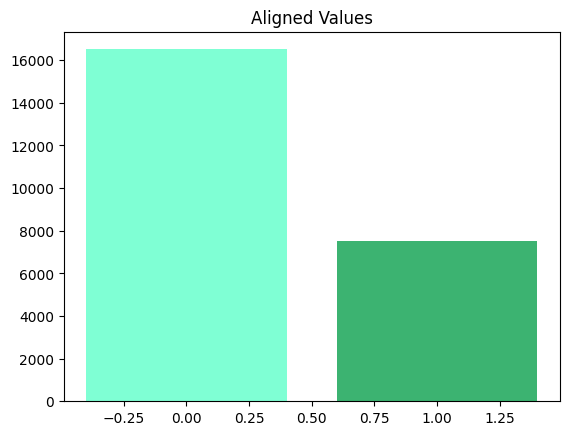

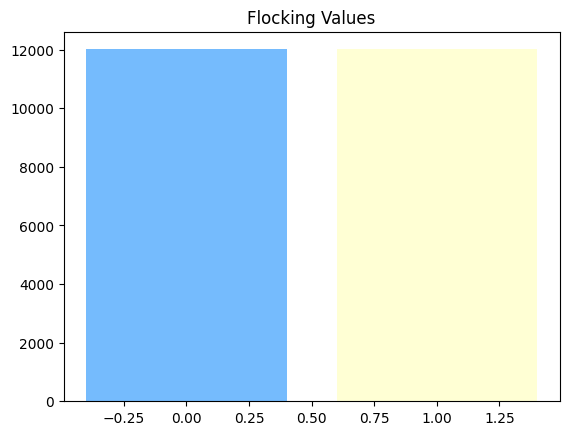

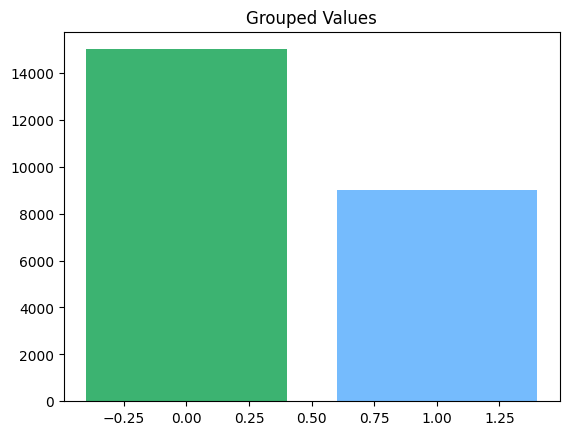

In [107]:
aligned_counts = df_Aligned['Class'].value_counts()
flocking_counts = df_Flocking['Class'].value_counts()
grouped_counts = df_Grouped['Class'].value_counts()

plt.bar(aligned_counts.index, aligned_counts.values, color=['aquamarine','mediumseagreen'])
plt.title("Aligned Values")
plt.show()

plt.bar(flocking_counts.index, flocking_counts.values, color=['xkcd:sky blue', 'xkcd:eggshell'])
plt.title("Flocking Values")
plt.show()

plt.bar(grouped_counts.index, grouped_counts.values, color=['mediumseagreen', 'xkcd:sky blue'])
plt.title("Grouped Values")
plt.show()

Para 'Aligned' e 'Grouped', os datasets estão desbalanceados, o primeiro um pouco mais que o segundo.

Curiosamente, para Flocking o dataset está perfeitamente balanceado

In [110]:
print(aligned_counts)
print(flocking_counts)
print(grouped_counts)

0    16511
1     7505
Name: Class, dtype: int64
0    12008
1    12008
Name: Class, dtype: int64
0    15010
1     9006
Name: Class, dtype: int64


Com relação às features